In [1]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [3]:
# 檔案資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


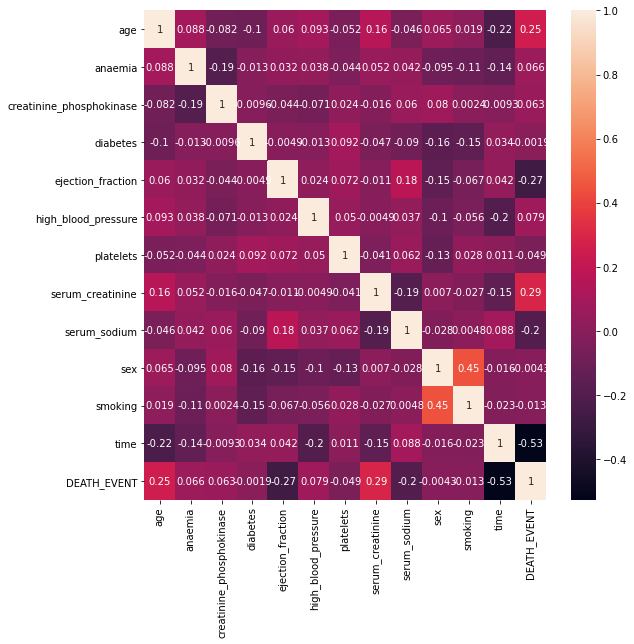

In [4]:
# 相關係數
corr = df.corr()
large = 10; med = 10; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (9, 9),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)

In [5]:
from sklearn.model_selection import train_test_split

#選擇需要欄位
y = df['DEATH_EVENT']
# 丟棄不要欄位
drop_col = ['DEATH_EVENT']
x = df.drop(drop_col, axis=1)
# 切出訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
print(x)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

-------RandomForest-------
acc=41
f1=0.5128205128205129
-------DecsionTree-------
acc=38
f1=0.5
-------Ann-------
acc=25
f1=0.5783132530120482
confusion martix


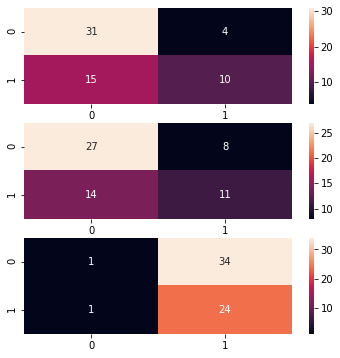

In [7]:
# 載入模型
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

tr = tree.DecisionTreeClassifier(random_state=42)
tr.fit(X_train, y_train)

ann = MLPClassifier(random_state=42, verbose=False)
ann.fit(X_train, y_train)

# 預測
rf_predict = rf.predict(X_test)
tr_predict = tr.predict(X_test)
ann_predict = ann.predict(X_test)

# 模型效能指標
rf_acc = accuracy_score(y_test, rf_predict,normalize=False)
rf_f1 = f1_score(y_test, rf_predict)
tr_acc = accuracy_score(y_test, tr_predict,normalize=False)
tr_f1 = f1_score(y_test, tr_predict)
ann_acc = accuracy_score(y_test, ann_predict,normalize=False)
ann_f1 = f1_score(y_test, ann_predict)

# 混淆矩陣
rf_confusion = confusion_matrix(y_test, rf_predict)
tr_confusion = confusion_matrix(y_test, tr_predict)
ann_confusion = confusion_matrix(y_test, ann_predict)


print("-------RandomForest-------")
print("acc={}".format(rf_acc))
print("f1={}".format(rf_f1))

print("-------DecsionTree-------")
print("acc={}".format(tr_acc))
print("f1={}".format(tr_f1))

print("-------Ann-------")
print("acc={}".format(ann_acc))
print("f1={}".format(ann_f1))


print("confusion martix")
fig, ax = plt.subplots(nrows=3, figsize=(6,6))
sns.heatmap(rf_confusion, annot=True, ax=ax[0])
sns.heatmap(tr_confusion, annot=True, ax=ax[1])
sns.heatmap(ann_confusion, annot=True, ax=ax[2])

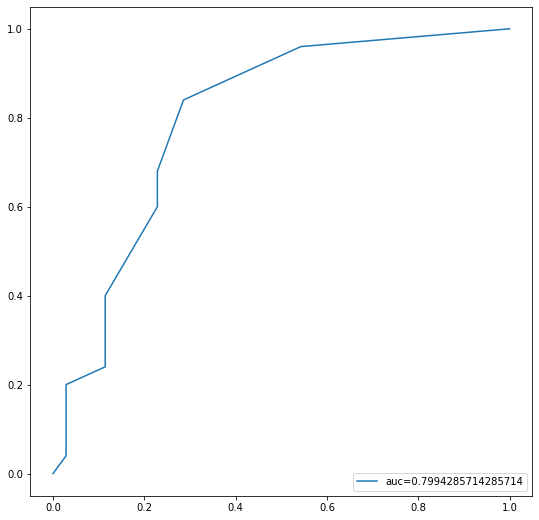

In [8]:
# ROC curve
from sklearn import metrics
y_pred_proba= rf.predict_proba(X_test)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

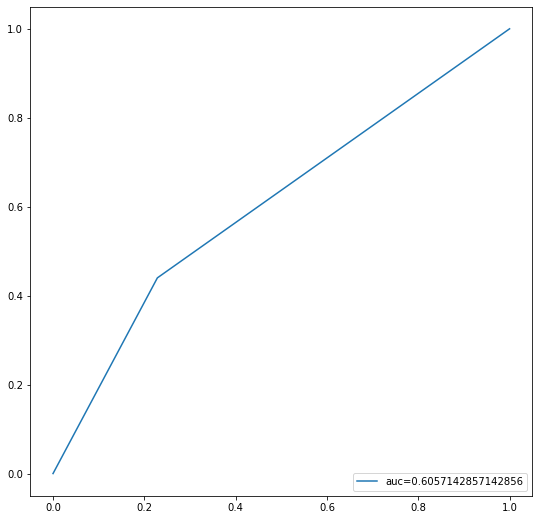

In [9]:
# ROC curve
from sklearn import metrics
y_pred_proba= tr.predict_proba(X_test)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

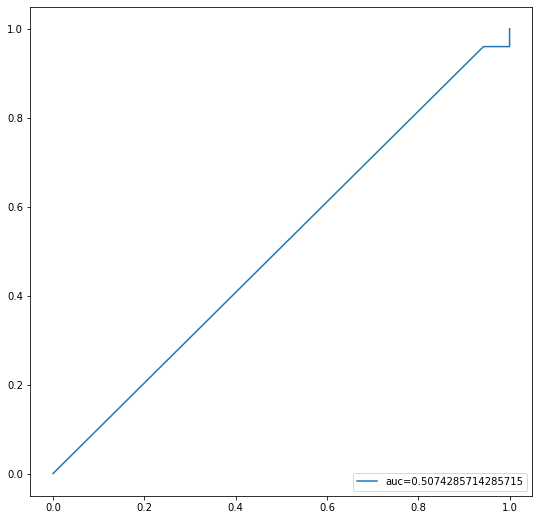

In [10]:
# ROC curve
from sklearn import metrics
y_pred_proba= ann.predict_proba(X_test)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

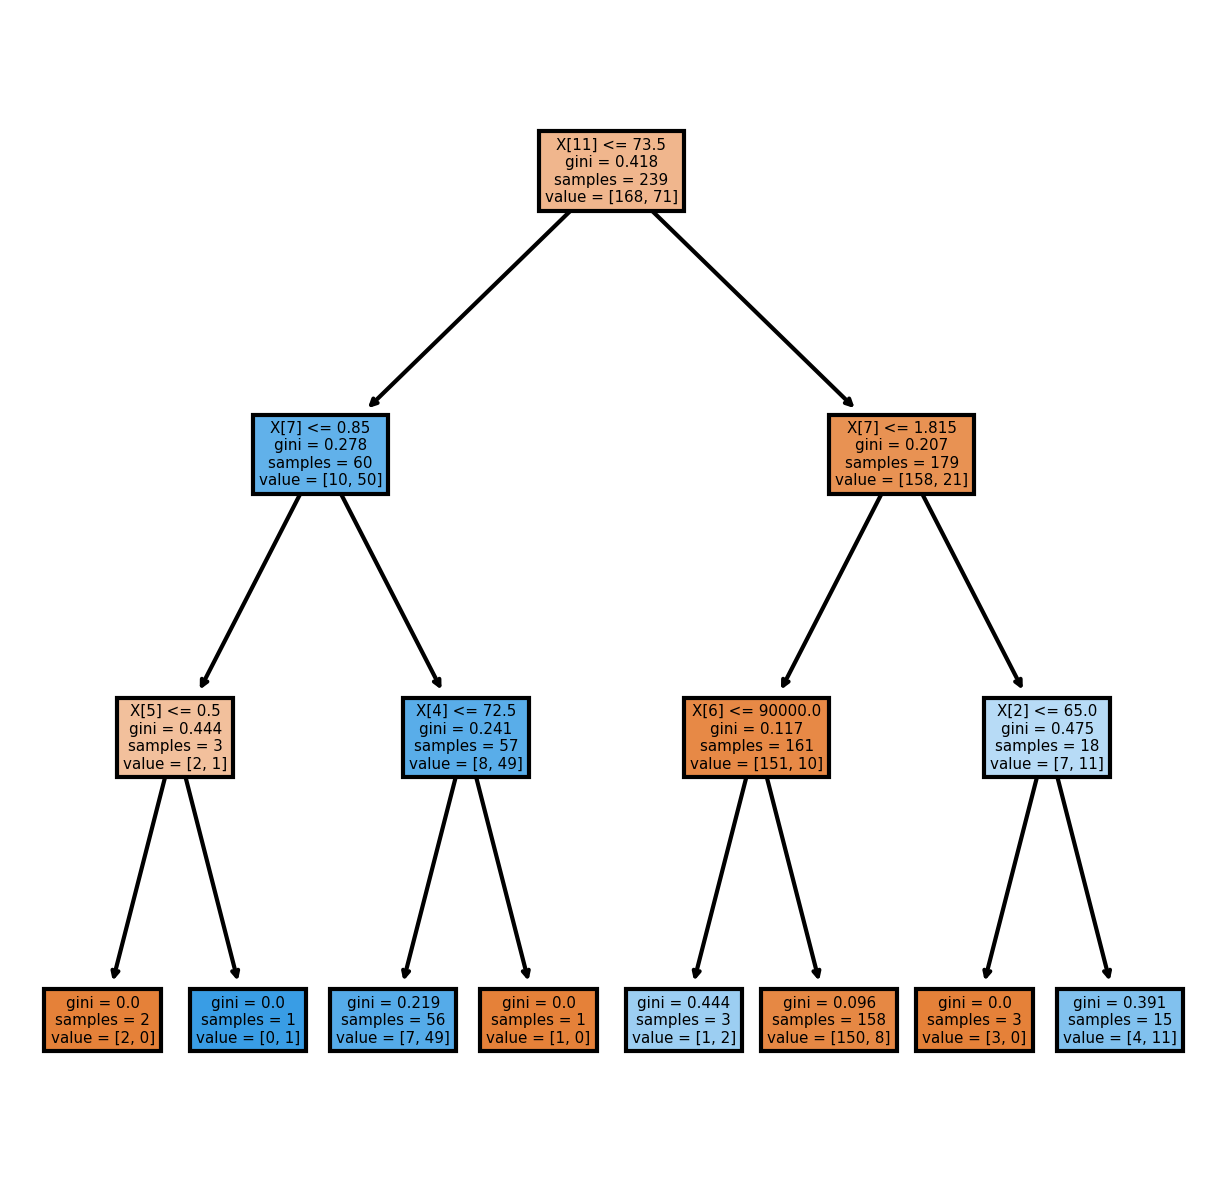

In [11]:
#from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.tree
clf = sklearn.tree.DecisionTreeClassifier(max_depth=3, random_state = 0)
#clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf,filled = True) ;

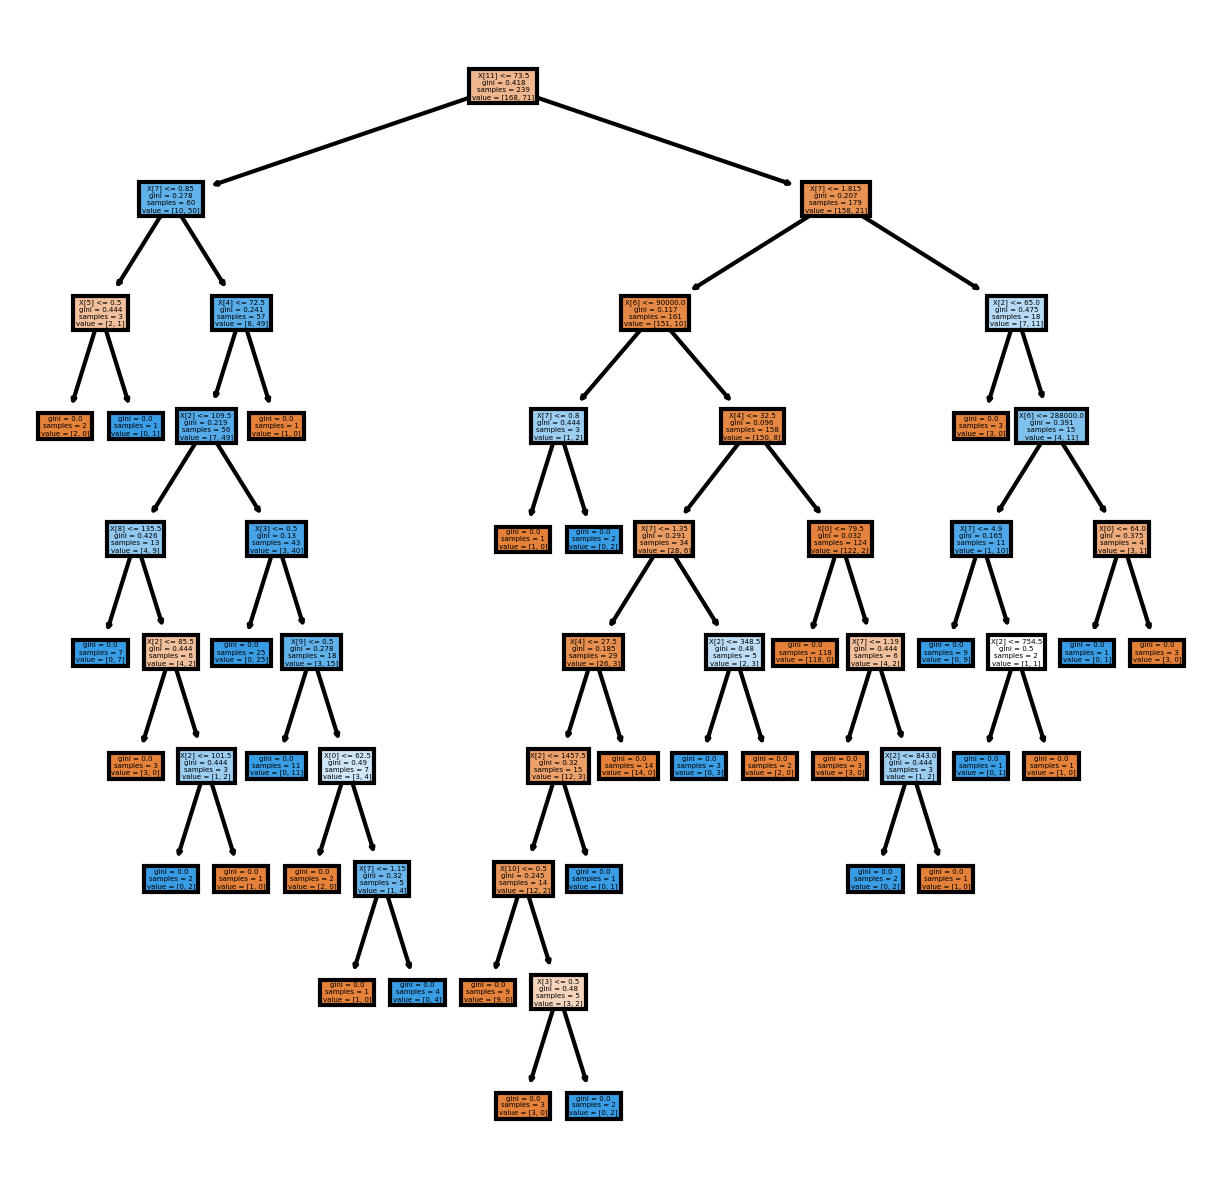

In [12]:
#from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.tree
clf = sklearn.tree.DecisionTreeClassifier(max_depth=None, random_state = 0)
#clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf,filled = True) ;

In [13]:
!pip install eli5
import eli5 as eli5
eli5.show_weights(clf, feature_names=X_train.columns.tolist())

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.4616,time
0.1856,serum_creatinine
0.1261,creatinine_phosphokinase
0.0479,platelets
0.0461,age
0.0346,ejection_fraction
0.0299,diabetes
0.0288,serum_sodium
0.0157,sex
0.0134,high_blood_pressure


In [14]:
from eli5 import show_prediction 
eli5.show_prediction(clf, X_train.iloc[1],show_feature_values=True)